1. Импорт данных


Установка зависимостей и установка

In [1]:
# работа с файловой системой
import os
import tensorflow as tf

2023-06-02 16:56:24.807950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 16:56:25.727942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-06-02 16:56:27.010816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:56:27.279600: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Установка данных

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Download and explore the dataset
import PIL
import pathlib
dataset_url = './data/Изображения подготовленные/Карп'
data_dir = pathlib.Path(dataset_url)

image_count = len(list(data_dir.glob('*/*.*')))
print('image_count:', image_count)

paths = list(data_dir.glob('*/*.*'))

classes_names = list(str(data_dir.glob('*')))


image_count: 464


In [10]:
# Имена классов
classes_paths = list((data_dir.glob('*/*.*')))
classes_paths = list(map(str, classes_paths)) # Список элементов str

classes_names = list((data_dir.glob('*'))) # Спиок элементов PosixPath
classes_n = len(classes_names)
classes_names = list(map(str, classes_names)) # Список элементов str
classes_names = [classes_names[i][classes_names[i].rfind(r'/') + 1:] for i in range(classes_n)]

print(classes_paths)
print(classes_names)
print(classes_n)

['data/Изображения подготовленные/Карп/эозинофил/11.jpg', 'data/Изображения подготовленные/Карп/эозинофил/680.jpg', 'data/Изображения подготовленные/Карп/эозинофил/0.jpg', 'data/Изображения подготовленные/Карп/эозинофил/075.jpg', 'data/Изображения подготовленные/Карп/эозинофил/77.jpg', 'data/Изображения подготовленные/Карп/эозинофил/178.jpg', 'data/Изображения подготовленные/Карп/эозинофил/7.jpg', 'data/Изображения подготовленные/Карп/эозинофил/88.jpg', 'data/Изображения подготовленные/Карп/эозинофил/50.jpg', 'data/Изображения подготовленные/Карп/эозинофил/70.jpg', 'data/Изображения подготовленные/Карп/эозинофил/498.jpg', 'data/Изображения подготовленные/Карп/эозинофил/23.jpg', 'data/Изображения подготовленные/Карп/эозинофил/790.jpg', 'data/Изображения подготовленные/Карп/эозинофил/7890.jpg', 'data/Изображения подготовленные/Карп/эозинофил/67.jpg', 'data/Изображения подготовленные/Карп/эозинофил/63.jpg', 'data/Изображения подготовленные/Карп/эозинофил/66.jpg', 'data/Изображения подгото

In [11]:
list((data_dir.glob('*' + str(classes_names[6]) + '/*.*')))

[PosixPath('data/Изображения подготовленные/Карп/нормобласт/74.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/570.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/4465.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/875.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/986.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/744.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/889.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/778.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/7654.bmp'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/83.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/09.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/36.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/7788.jpg'),
 PosixPath('data/Изображения подготовленные/Карп/нормобласт/7655.bmp'),
 Posix

In [12]:
list((data_dir.glob(r'*content/gdrive/MyDrive/Клетки крови рыб/Изображения подготовленные/Карп/миелоцит/*.*')))

[]

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 2.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01


classes_sizes: [40, 23, 21, 9, 25, 10, 35, 39, 42, 67, 25, 1, 19, 63, 45]
sum(classes_sizes): 464


<AxesSubplot:>

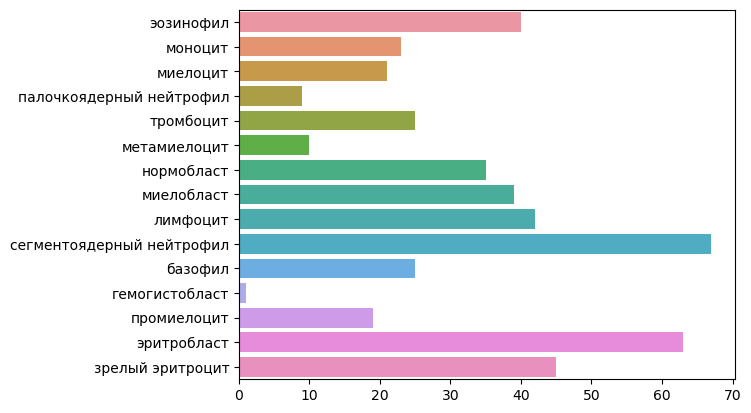

In [16]:
import seaborn as sns
classes_sizes = []

for i in range(classes_n):
    counter = 0
    class_folderName = '/' + classes_names[i] + '/'
    for j in range(image_count):
        if class_folderName in classes_paths[j]:
            counter += 1
    classes_sizes.append(counter)

print('classes_sizes:', classes_sizes)
print('sum(classes_sizes):', sum(classes_sizes))


sns.barplot(y = classes_names, x = classes_sizes)



In [17]:
'*/' + str(classes_names[6]) + '/*.*'

'*/нормобласт/*.*'

In [18]:
#list((data_dir.glob('*/' + str(classes_names[0]) )))
classes_sizes = [len(list((data_dir.glob('*' + str(classes_names[i]) + '/*.*')))) for i in range(classes_n)]
print('classes_sizes:', classes_sizes)
print('sum(classes_sizes):', sum(classes_sizes))

classes_sizes: [40, 23, 50, 9, 25, 10, 35, 39, 42, 67, 25, 1, 19, 63, 45]
sum(classes_sizes): 493


In [20]:
data_carp = tf.keras.utils.image_dataset_from_directory('./data/Изображения подготовленные/Карп')
print(tf.data.experimental.cardinality(data_carp).numpy())

image_count = len(list(data_carp))
print(image_count)



Found 464 files belonging to 15 classes.
15
15


2023-06-02 17:05:46.459492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [464]
	 [[{{node Placeholder/_4}}]]
2023-06-02 17:05:46.459884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [464]
	 [[{{node Placeholder/_0}}]]


In [40]:
data_carp

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# приводим к численному виду
data_iterator = data_carp.as_numpy_iterator()

In [59]:
# проходим по каждому batch
batch = data_iterator.next()

In [51]:
imgs, labels = next(data_iterator)
labels

array([13,  5, 14, 12,  2,  2,  8, 11,  5,  3, 11,  3, 14, 14,  7,  0,  4,
       14,  3, 12,  3,  5,  6,  0, 13, 13, 11, 11, 13, 11, 13,  2],
      dtype=int32)

11
6
11
14
2


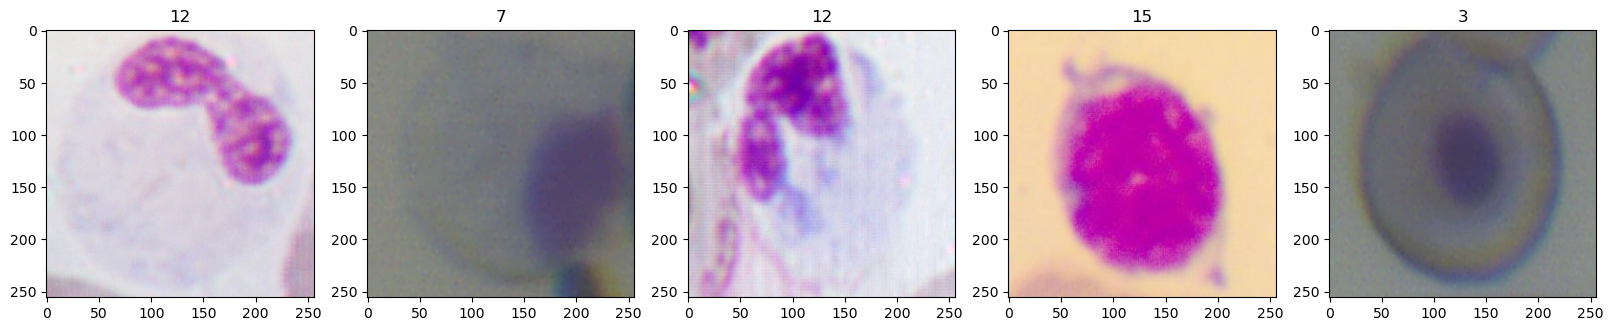

In [60]:
# каждый класс (от 0 до 14) определяет клетку крови
# например 0 - базофил, 14 - эритробласт
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    print(batch[1][idx])
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx] + 1)

In [61]:
for image_batch, labels_batch in data_carp:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#print(tf.data.experimental.cardinality(data_carp).numpy())

(32, 256, 256, 3)
(32,)


Маштабируем данные

In [62]:
# значение batch[0] от 0 до 255
# приведет к значению от 0 до 1 для оптимизации
data = data_carp.map(lambda x, y: (x / 255, y))

In [63]:
# опять приводим к виду numpy
data.as_numpy_iterator().next()[0][0]

2023-06-02 17:17:37.698472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [464]
	 [[{{node Placeholder/_4}}]]
2023-06-02 17:17:37.699184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [464]
	 [[{{node Placeholder/_0}}]]


array([[[0.7090824 , 0.6384942 , 0.69170815],
        [0.71356463, 0.63513327, 0.6813221 ],
        [0.71267617, 0.6342448 , 0.67738205],
        ...,
        [0.8337854 , 0.90376836, 0.89411765],
        [0.84069395, 0.8957797 , 0.87243414],
        [0.8526425 , 0.8879366 , 0.86832875]],

       [[0.71344525, 0.64537245, 0.6874004 ],
        [0.70713663, 0.64046997, 0.6785711 ],
        [0.7132889 , 0.63543147, 0.67163754],
        ...,
        [0.8265707 , 0.9031945 , 0.89173615],
        [0.84295344, 0.8980392 , 0.87469363],
        [0.8543613 , 0.8907367 , 0.87058824]],

       [[0.7099265 , 0.6520374 , 0.67948836],
        [0.7068775 , 0.648054  , 0.675505  ],
        [0.70964307, 0.6429764 , 0.6696903 ],
        ...,
        [0.8208937 , 0.9051453 , 0.89041144],
        [0.8404554 , 0.89820117, 0.8789205 ],
        [0.8507431 , 0.89411765, 0.8784314 ]],

       ...,

       [[0.29628506, 0.        , 0.52373606],
        [0.30811888, 0.01007966, 0.53556985],
        [0.31320375, 0

Разделение данных (train, validation, test)

In [64]:
len(data_carp)

15

In [22]:
len(data)

15

In [65]:
train_size = round(len(data_carp) * .8)
validation_size = round(len(data_carp) * .1)
test_size = round(len(data_carp)* .1)

In [66]:
train = data_carp.take(train_size)
validation = data_carp.skip(train_size).take(validation_size)
test = data_carp.skip(train_size + validation_size).take(test_size)

'''
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)
'''



'\ntrain = data.take(train_size)\nvalidation = data.skip(train_size).take(validation_size)\ntest = data.skip(train_size + validation_size).take(test_size)\n'

In [67]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [68]:
len(data_carp)

15

Создание нейронной модели

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import callbacks
import pandas as pd

In [71]:
'''
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
'''

'''
# accuracy_best = 0.06
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32, (3,3), 1, activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(16, (3,3), 1, activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(15, activation='softmax'),
    #Flatten() # Иначе ошибка при model.fit()
    #GlobalAveragePooling2D()

])
'''


# accuracy_best = 0.375
model = Sequential([
    Conv2D(filters = 16, 
           kernel_size = (3, 3), 
           strides = (1, 1), 
           padding = 'same', 
           activation='relu', 
           input_shape = (256, 256, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(15, activation='softmax'),
    #Flatten() # Иначе ошибка при model.fit()
    #GlobalAveragePooling2D()

])




In [72]:
'''
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
'''

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 256)               67109120  
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 67,113,423
Trainable params: 67,113,423
Non-trainable params: 0
____________________________________________

Обучение

In [30]:
# тут можно добавить логи, но пока не разобрался как

In [74]:
# остановка при стагнации
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=2, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [78]:
# history = model.fit(x = train, epochs = 50, validation_data=validation, callbacks=[early_stopping])
history = model.fit(x = train, epochs = 50, validation_data=validation)

Epoch 1/50
12/12 [==============================] - 7s 576ms/step - loss: 4.3556 - accuracy: 0.6536 - val_loss: 2.3662 - val_accuracy: 0.8281
Epoch 2/50
12/12 [==============================] - 7s 569ms/step - loss: 6.5538 - accuracy: 0.6354 - val_loss: 4.2036 - val_accuracy: 0.6094
Epoch 3/50
12/12 [==============================] - 7s 569ms/step - loss: 3.9775 - accuracy: 0.6693 - val_loss: 3.0506 - val_accuracy: 0.6719
Epoch 4/50
12/12 [==============================] - 7s 568ms/step - loss: 3.7635 - accuracy: 0.7031 - val_loss: 1.8586 - val_accuracy: 0.8125
Epoch 5/50
12/12 [==============================] - 7s 571ms/step - loss: 2.1538 - accuracy: 0.7630 - val_loss: 3.3421 - val_accuracy: 0.6719
Epoch 6/50
12/12 [==============================] - 7s 571ms/step - loss: 3.2471 - accuracy: 0.7109 - val_loss: 2.0241 - val_accuracy: 0.8281
Epoch 7/50
12/12 [==============================] - 7s 569ms/step - loss: 5.7711 - accuracy: 0.6484 - val_loss: 8.7536 - val_accuracy: 0.4531
Epoch 

Plots

Minimum validation loss: 0.02162327617406845


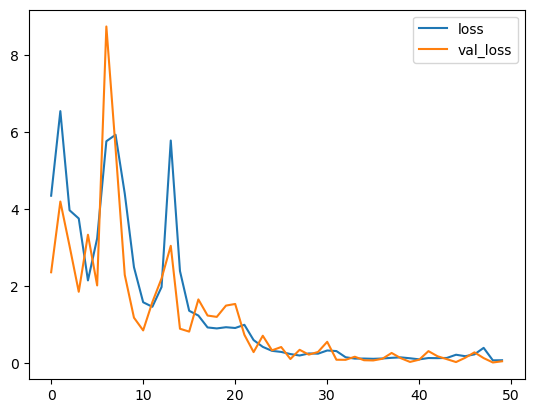

In [79]:
# вывод в виде граффика
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Maximum validation accuracy: 0.453125


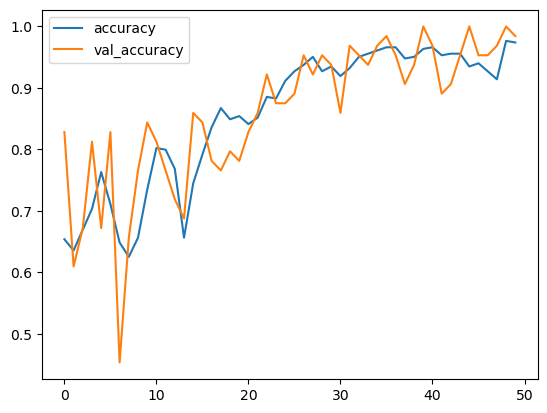

In [80]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation accuracy: {}".format(history_df['val_accuracy'].min()))

Оценка

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, Accuracy

2023-06-02 17:31:27.715072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [464]
	 [[{{node Placeholder/_4}}]]
2023-06-02 17:31:27.715322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [464]
	 [[{{node Placeholder/_4}}]]


0
1/1 [==============================] - 0s 90ms/step
10
4
12
4
5
2
y:
[10  4 12  4  5  2  5  5 11 14  7 11 11  3  3 14]
y_pred:
[10  4 12  4  5  2  5  5 11 14  7 11 11  3  3 14]
Precision: 1.0, Recall:1.0, Accuracy: 1.0



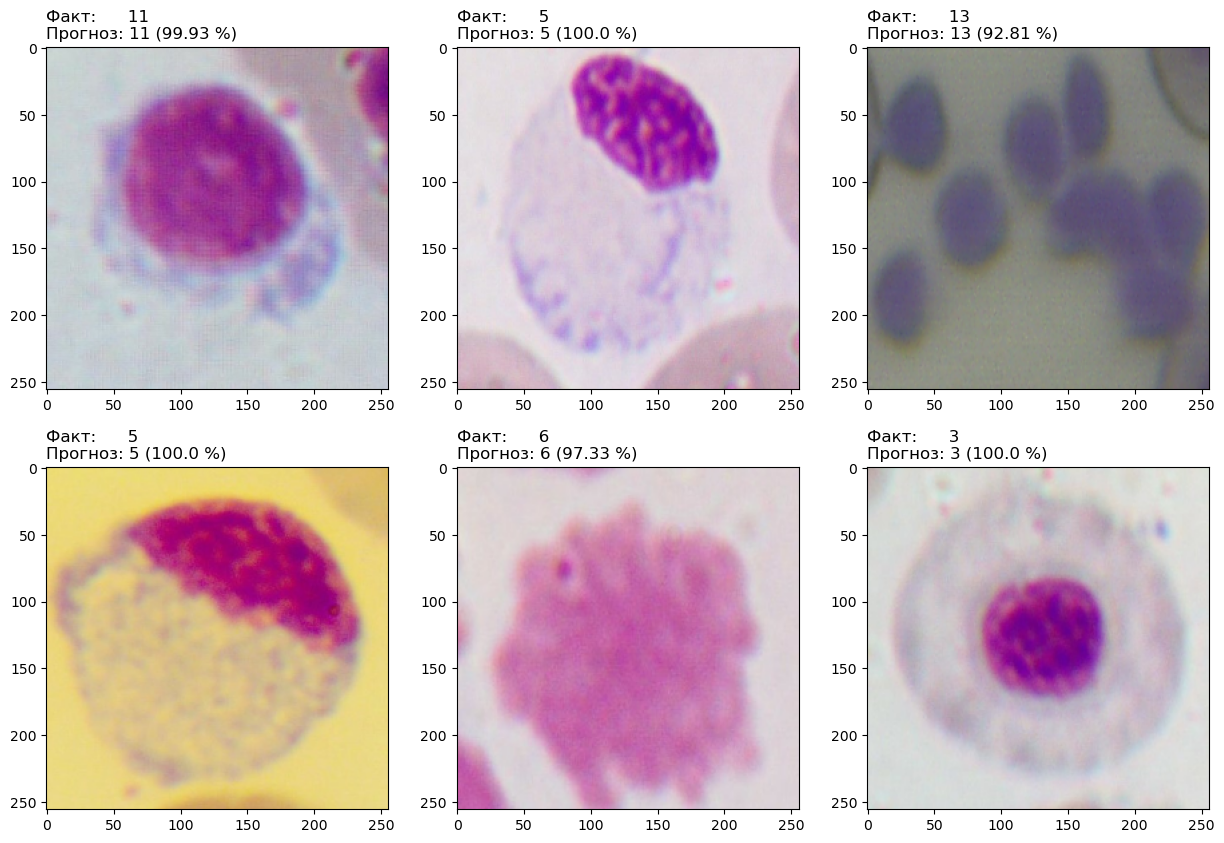

In [82]:
precision = Precision()
recall = Recall()
accuracy = Accuracy()

i = 0


float_formatter = "{:.4}".format

figure_nrows = 2
figure_ncols = 3
figure_nplots = figure_nrows * figure_ncols

fig, ax = plt.subplots(nrows = figure_nrows, ncols = figure_ncols, figsize = (15, 10))
for batch in test.as_numpy_iterator(): 
    print(i)
    i += 1
    X, y = batch
    yhat = model.predict(X)
    y_pred = np.asarray([np.argmax(i) for i in yhat], dtype = 'int32')
    y_pred_prob = (np.asarray([np.max(i) for i in yhat], dtype = 'float32') * 100)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

    col_idx = 0
    row_idx = 0
    for idx, img in enumerate(batch[0][:figure_nplots]):

        if col_idx == figure_ncols:
            col_idx = 0
            row_idx += 1

        print(batch[1][idx])
        ax[row_idx, col_idx].imshow(img.astype(int))
        plot_text = f'Факт:      {y[idx] + 1} \nПрогноз: {y_pred[idx] + 1} ({float_formatter(y_pred_prob[idx])} %)'
        #ax[row_idx, col_idx].title.set_text(plot_text)
        
        ax[row_idx, col_idx].set_title(plot_text, loc = 'left')

        col_idx += 1

print('y:')
print(y)
print('y_pred:')
print(y_pred)
print(f'Precision: {precision.result()}, Recall:{recall.result()}, Accuracy: {accuracy.result()}')
print()

10
4
12
4
5


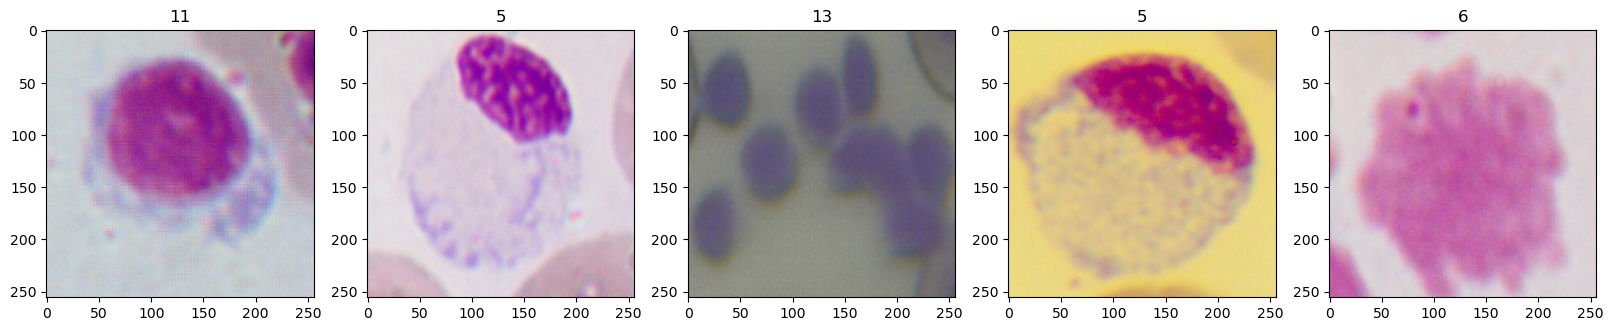

In [83]:
# каждый класс (от 0 до 14) определяет клетку крови
# например 0 - базофил, 14 - эритробласт
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    print(batch[1][idx])
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx] + 1)

In [84]:
yhat

array([[8.4888509e-24, 9.8233944e-28, 5.2715796e-21, 1.0779433e-11,
        2.1930528e-33, 2.1759965e-09, 2.5190682e-20, 2.4675691e-18,
        2.3896358e-17, 1.9855813e-30, 9.9926651e-01, 4.3005815e-15,
        0.0000000e+00, 2.3923333e-19, 7.3351664e-04],
       [3.3923091e-22, 6.9837528e-16, 2.2385963e-24, 6.1498719e-31,
        9.9999875e-01, 3.1191953e-24, 1.7968670e-12, 3.6976078e-12,
        5.5455914e-16, 5.4246108e-17, 2.7053563e-16, 1.1685873e-06,
        9.8665911e-12, 1.1231719e-14, 7.4182559e-21],
       [1.6843489e-05, 1.6839002e-04, 4.0042618e-05, 8.1655744e-06,
        1.1664080e-04, 4.9011941e-09, 2.1832919e-05, 3.6167456e-03,
        1.1965359e-03, 3.5500673e-03, 3.2002261e-04, 5.7891551e-02,
        9.2808813e-01, 1.3502346e-03, 3.6148285e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 1.7202050e-35, 1.3502707e-36,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3567595e-23,
        0.0000000e+00,

In [94]:
y

array([10,  4, 12,  4,  5,  2,  5,  5, 11, 14,  7, 11, 11,  3,  3, 14],
      dtype=int32)

In [86]:
y_pred

array([10,  4, 12,  4,  5,  2,  5,  5, 11, 14,  7, 11, 11,  3,  3, 14],
      dtype=int32)

In [87]:
y[13] == y_pred[13]

True

In [88]:
print(f'Precision: {precision.result()}, Recall:{recall.result()}, Accuracy: {accuracy.result()}')
# по итогу видно, что accuracy (точность) = 0.02, что очень мало.
# необходимо приближать это значение к 1.0

Precision: 1.0, Recall:1.0, Accuracy: 1.0


In [89]:
accuracy.result().numpy()

1.0

In [90]:
precision.update_state(y, y_pred)

In [91]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [93]:
'''
https://www.kaggle.com/search?q=multi+classification+images+conv2d
https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

https://www.tensorflow.org/tutorials/images/classification

'''


# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'x_val' is not defined